In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
first_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/Inventory Dataset.xlsx")
second_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/New Inventory.xlsx")

In [4]:
merged=first_inventory.merge(second_inventory)

In [5]:
selected_features=merged[['Item Number','Inventory Receive','Total Item Qty']]

In [6]:
grouped=selected_features.groupby(["Item Number","Inventory Receive"]).sum()

In [7]:
grouped

Total Item Qty
Item Number Inventory Receive                
064-01-1346 2023-07-07                   1072
            2023-07-09                   2464
            2023-07-10                   2000
            2023-08-04                   1400
            2023-08-16                   1000
...                                       ...
064-18-9938 2023-08-04                   1368
            2023-08-16                   2084
            2023-09-08                   2084
            2023-09-29                   1976
            2023-10-13                   1976

[909 rows x 1 columns]

In [8]:
skeleton=grouped.unstack()

In [9]:
df=pd.DataFrame()
for i in grouped.index:
    df[i[0],i[1]]=grouped.loc[i[0],i[1]]

In [10]:
dates=[]
for i in df.columns.get_level_values(0).to_list():
    dates.append(str(i[1].date()))
skeleton.columns=set(dates)

In [11]:
foo=skeleton.fillna(0).sort_index(axis=1)
foo.columns=pd.DatetimeIndex(foo.columns)

In [12]:
flag=[]
k=0
for i in range(len(foo.columns)):
    if (foo.columns[i].date()-foo.columns[k].date()).days==7:
        flag.append(sum(foo[foo.columns[0]],foo[foo.columns[i]]))
        k=i

In [13]:
container=pd.DataFrame()
for i in flag:
    container[i.name]=i

In [14]:
container # inventory on a weekly basis.

,2023-07-14,2023-07-21,2023-07-28,2023-08-04
Item Number,,,,
064-01-1346,413044.0,413044.0,413044.0,413044.0
064-01-1347,413044.0,413044.0,413044.0,413044.0
064-01-1348,413044.0,413044.0,413044.0,413044.0
064-01-1349,413044.0,413044.0,413044.0,413044.0
064-01-1351,413044.0,413044.0,413044.0,413044.0
...,...,...,...,...
064-18-9089,413044.0,413044.0,414644.0,414868.0
064-18-9182,413044.0,413044.0,413044.0,417272.0
064-18-9667,413044.0,413044.0,413044.0,413044.0


Task 1 accomplished
-------------------

In [15]:
# container['2023-07-14'].value_counts()
# container['2023-07-21'].value_counts()
# container['2023-07-28'].value_counts()
# container['2023-08-04'].value_counts()

In [16]:
import matplotlib.pyplot as plt

In [17]:
foo.columns

DatetimeIndex(['2023-07-07', '2023-07-09', '2023-07-10', '2023-07-14',
               '2023-07-21', '2023-07-28', '2023-08-04', '2023-08-16',
               '2023-08-18', '2023-08-22', '2023-08-25', '2023-09-08',
               '2023-09-29', '2023-10-13'],
              dtype='datetime64[ns]', freq=None)

In [18]:
match=dict()
for i in foo.columns:
    if i in match:
        match[i]+=foo[i].sum().sum()
    else:
        match[i]=foo[i].sum().sum()

In [19]:
match

{Timestamp('2023-07-07 00:00:00'): 413044.0,
 Timestamp('2023-07-09 00:00:00'): 192178.0,
 Timestamp('2023-07-10 00:00:00'): 1848.0,
 Timestamp('2023-07-14 00:00:00'): 3600.0,
 Timestamp('2023-07-21 00:00:00'): 23200.0,
 Timestamp('2023-07-28 00:00:00'): 16336.0,
 Timestamp('2023-08-04 00:00:00'): 157028.0,
 Timestamp('2023-08-16 00:00:00'): 70284.0,
 Timestamp('2023-08-18 00:00:00'): 341268.0,
 Timestamp('2023-08-22 00:00:00'): 9514.0,
 Timestamp('2023-08-25 00:00:00'): 183554.0,
 Timestamp('2023-09-08 00:00:00'): 166708.0,
 Timestamp('2023-09-29 00:00:00'): 210960.0,
 Timestamp('2023-10-13 00:00:00'): 94482.0}

In [20]:
convert_list = [(key.month, value) for key, value in match.items()]

In [21]:
convert_list

[(7, 413044.0),
 (7, 192178.0),
 (7, 1848.0),
 (7, 3600.0),
 (7, 23200.0),
 (7, 16336.0),
 (8, 157028.0),
 (8, 70284.0),
 (8, 341268.0),
 (8, 9514.0),
 (8, 183554.0),
 (9, 166708.0),
 (9, 210960.0),
 (10, 94482.0)]

In [22]:
final_dict={}
for i in range(len(convert_list)):
    if convert_list[i][0] in final_dict:
        final_dict[convert_list[i][0]] += convert_list[0][1]
    else:
        final_dict[convert_list[i][0]] = convert_list[0][1]
print(final_dict)

{7: 2478264.0, 8: 2065220.0, 9: 826088.0, 10: 413044.0}


In [23]:
labels = list(final_dict.keys())
heights = list(final_dict.values())

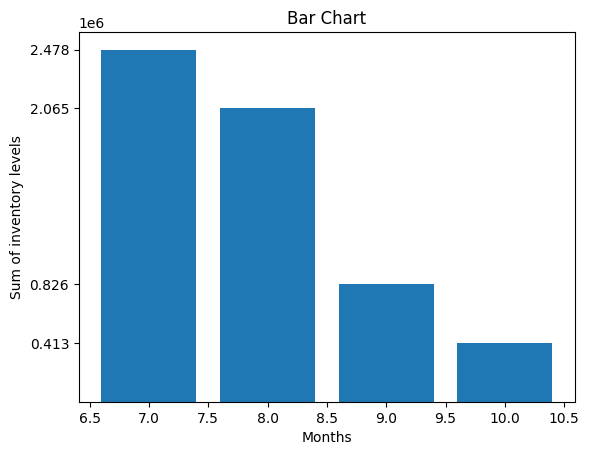

In [24]:
bars = plt.bar(labels,heights)

plt.xlabel('Months')
plt.ylabel('Sum of inventory levels')
plt.title('Bar Chart')

# total summation
plt.yticks(heights)

plt.show()

Task 2 accomplished
-------------------
The end

In [28]:
grouped

Total Item Qty
Item Number Inventory Receive                
064-01-1346 2023-07-07                   1072
            2023-07-09                   2464
            2023-07-10                   2000
            2023-08-04                   1400
            2023-08-16                   1000
...                                       ...
064-18-9938 2023-08-04                   1368
            2023-08-16                   2084
            2023-09-08                   2084
            2023-09-29                   1976
            2023-10-13                   1976

[909 rows x 1 columns]

In [46]:
grouped.pivot_table(index=grouped.index.get_level_values(0),columns=grouped.index.get_level_values(1),values="Total Item Qty")

Inventory Receive,2023-07-07,2023-07-09,2023-07-10,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-16,2023-08-18,2023-08-22,2023-08-25,2023-09-08,2023-09-29,2023-10-13
Item Number,,,,,,,,,,,,,,
064-01-1346,1072.0,2464.0,2000.0,NaN,NaN,NaN,1400.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
064-01-1347,1000.0,3568.0,2000.0,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-01-1348,788.0,1920.0,1644.0,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-01-1349,1000.0,2920.0,1904.0,NaN,NaN,NaN,2624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-01-1351,848.0,1308.0,648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9089,1600.0,4276.0,NaN,NaN,1600.0,1760.0,752.0,1824.0,NaN,NaN,NaN,1824.0,484.0,484.0
064-18-9182,NaN,8260.0,NaN,NaN,NaN,9336.0,4000.0,4228.0,NaN,NaN,NaN,4228.0,2416.0,2416.0
064-18-9667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992.0,992.0


In [44]:
grouped.unstack('Inventory Receive')

Total Item Qty                                               
Inventory Receive     2023-07-07 2023-07-09 2023-07-10 2023-07-14 2023-07-21   
Item Number                                                                    
064-01-1346               1072.0     2464.0     2000.0        NaN        NaN  \
064-01-1347               1000.0     3568.0     2000.0        NaN        NaN   
064-01-1348                788.0     1920.0     1644.0        NaN        NaN   
064-01-1349               1000.0     2920.0     1904.0        NaN        NaN   
064-01-1351                848.0     1308.0      648.0        NaN        NaN   
...                          ...        ...        ...        ...        ...   
064-18-9089               1600.0     4276.0        NaN        NaN     1600.0   
064-18-9182                  NaN     8260.0        NaN        NaN        NaN   
064-18-9667                  NaN        NaN        NaN        NaN        NaN   
064-18-9724               1600.0     4260.0        NaN        NaN     1600.0   
064-18-9938                  NaN     2764.0        NaN        NaN        NaN   

                                                                           
Inventory Receive 2023-07-28 2023-08-04 2023-08-16 2023-08-18 2023-08-22   
Item Number                                                                
064-01-1346              NaN     1400.0     1000.0        NaN        NaN  \
064-01-1347              NaN     1800.0        NaN        NaN        NaN   
064-01-1348              NaN     1200.0        NaN        NaN        NaN   
064-01-1349              NaN     2624.0        NaN        NaN        NaN   
064-01-1351              NaN        NaN        NaN        NaN        NaN   
...                      ...        ...        ...        ...        ...   
064-18-9089           1760.0      752.0     1824.0        NaN        NaN   
064-18-9182           9336.0     4000.0     4228.0        NaN        NaN   
064-18-9667              NaN        NaN        NaN        NaN        NaN   
064-18-9724           2420.0     1036.0        NaN        NaN        NaN   
064-18-9938           3196.0     1368.0     2084.0        NaN        NaN   

                                                               
Inventory Receive 2023-08-25 2023-09-08 2023-09-29 2023-10-13  
Item Number                                                    
064-01-1346              NaN        NaN        NaN        NaN  
064-01-1347              NaN        NaN        NaN        NaN  
064-01-1348              NaN        NaN        NaN        NaN  
064-01-1349              NaN        NaN        NaN        NaN  
064-01-1351              NaN        NaN        NaN        NaN  
...                      ...        ...        ...        ...  
064-18-9089              NaN     1824.0      484.0      484.0  
064-18-9182              NaN     4228.0     2416.0     2416.0  
064-18-9667              NaN        NaN      992.0      992.0  
064-18-9724              NaN        NaN      200.0      200.0  
064-18-9938              NaN     2084.0     1976.0     1976.0  

[166 rows x 14 columns]

In [45]:
grouped.unstack()

Total Item Qty                                               
Inventory Receive     2023-07-07 2023-07-09 2023-07-10 2023-07-14 2023-07-21   
Item Number                                                                    
064-01-1346               1072.0     2464.0     2000.0        NaN        NaN  \
064-01-1347               1000.0     3568.0     2000.0        NaN        NaN   
064-01-1348                788.0     1920.0     1644.0        NaN        NaN   
064-01-1349               1000.0     2920.0     1904.0        NaN        NaN   
064-01-1351                848.0     1308.0      648.0        NaN        NaN   
...                          ...        ...        ...        ...        ...   
064-18-9089               1600.0     4276.0        NaN        NaN     1600.0   
064-18-9182                  NaN     8260.0        NaN        NaN        NaN   
064-18-9667                  NaN        NaN        NaN        NaN        NaN   
064-18-9724               1600.0     4260.0        NaN        NaN     1600.0   
064-18-9938                  NaN     2764.0        NaN        NaN        NaN   

                                                                           
Inventory Receive 2023-07-28 2023-08-04 2023-08-16 2023-08-18 2023-08-22   
Item Number                                                                
064-01-1346              NaN     1400.0     1000.0        NaN        NaN  \
064-01-1347              NaN     1800.0        NaN        NaN        NaN   
064-01-1348              NaN     1200.0        NaN        NaN        NaN   
064-01-1349              NaN     2624.0        NaN        NaN        NaN   
064-01-1351              NaN        NaN        NaN        NaN        NaN   
...                      ...        ...        ...        ...        ...   
064-18-9089           1760.0      752.0     1824.0        NaN        NaN   
064-18-9182           9336.0     4000.0     4228.0        NaN        NaN   
064-18-9667              NaN        NaN        NaN        NaN        NaN   
064-18-9724           2420.0     1036.0        NaN        NaN        NaN   
064-18-9938           3196.0     1368.0     2084.0        NaN        NaN   

                                                               
Inventory Receive 2023-08-25 2023-09-08 2023-09-29 2023-10-13  
Item Number                                                    
064-01-1346              NaN        NaN        NaN        NaN  
064-01-1347              NaN        NaN        NaN        NaN  
064-01-1348              NaN        NaN        NaN        NaN  
064-01-1349              NaN        NaN        NaN        NaN  
064-01-1351              NaN        NaN        NaN        NaN  
...                      ...        ...        ...        ...  
064-18-9089              NaN     1824.0      484.0      484.0  
064-18-9182              NaN     4228.0     2416.0     2416.0  
064-18-9667              NaN        NaN      992.0      992.0  
064-18-9724              NaN        NaN      200.0      200.0  
064-18-9938              NaN     2084.0     1976.0     1976.0  

[166 rows x 14 columns]

In [39]:
set(grouped.index.get_level_values(0))

{'064-01-1346',
 '064-01-1347',
 '064-01-1348',
 '064-01-1349',
 '064-01-1351',
 '064-01-1360',
 '064-01-1361',
 '064-01-1362',
 '064-01-1363',
 '064-01-1365',
 '064-01-1375',
 '064-01-1384',
 '064-01-1385',
 '064-01-1386',
 '064-01-1388',
 '064-01-1389',
 '064-01-1398',
 '064-01-1399',
 '064-01-1400',
 '064-01-1401',
 '064-01-1403',
 '064-01-1408',
 '064-01-1409',
 '064-01-1410',
 '064-01-1411',
 '064-01-1413',
 '064-01-1423',
 '064-01-1424',
 '064-01-1430',
 '064-01-1431',
 '064-01-1437',
 '064-01-1443',
 '064-01-1444',
 '064-01-1445',
 '064-01-1446',
 '064-01-1448',
 '064-09-0006',
 '064-09-0041',
 '064-09-0042',
 '064-09-0043',
 '064-09-0054',
 '064-09-0059',
 '064-09-0250',
 '064-09-0631',
 '064-09-0733',
 '064-09-0942',
 '064-09-1062',
 '064-09-2179',
 '064-09-2641',
 '064-09-3154',
 '064-09-3413',
 '064-09-3490',
 '064-09-3600',
 '064-09-3654',
 '064-09-3787',
 '064-09-3958',
 '064-09-4261',
 '064-09-4332',
 '064-09-4450',
 '064-09-4642',
 '064-09-4784',
 '064-09-5086',
 '064-09

In [40]:
set(grouped.index.get_level_values(1))

{Timestamp('2023-07-07 00:00:00'),
 Timestamp('2023-07-09 00:00:00'),
 Timestamp('2023-07-10 00:00:00'),
 Timestamp('2023-07-14 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-07-28 00:00:00'),
 Timestamp('2023-08-04 00:00:00'),
 Timestamp('2023-08-16 00:00:00'),
 Timestamp('2023-08-18 00:00:00'),
 Timestamp('2023-08-22 00:00:00'),
 Timestamp('2023-08-25 00:00:00'),
 Timestamp('2023-09-08 00:00:00'),
 Timestamp('2023-09-29 00:00:00'),
 Timestamp('2023-10-13 00:00:00')}

In [54]:
# import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'A': ['foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar'],
    'B': ['one', 'one', 'two', 'two', 'one', 'one', 'two', 'two'],
    'C': ['small', 'large', 'large', 'small', 'small', 'small', 'large', 'small'],
    'D': [1, 2, 2, 3, 3, 4, 5, 6],
    'E': [2, 4, 5, 5, 6, 6, 8, 9]
})

# Pivot Table
pivot_table = df.pivot_table(values='D', index=['A', 'B'], columns=['C'], aggfunc='sum')

# Unstack
# unstack = df.set_index(['A', 'B', 'C']).unstack().sum()

print("Pivot Table:")
print(pivot_table)
print("\nUnstack:")
# print(unstack)


Pivot Table:
C        large  small
A   B                
bar one    NaN    7.0
    two    5.0    6.0
foo one    2.0    1.0
    two    2.0    3.0

Unstack:


<Axes: xlabel='A,B'>

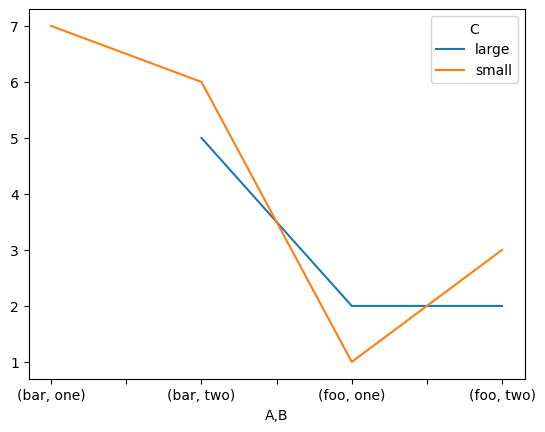

In [55]:
pivot_table.plot()

array([[<Axes: title={'center': 'large'}>,
        <Axes: title={'center': 'small'}>]], dtype=object)

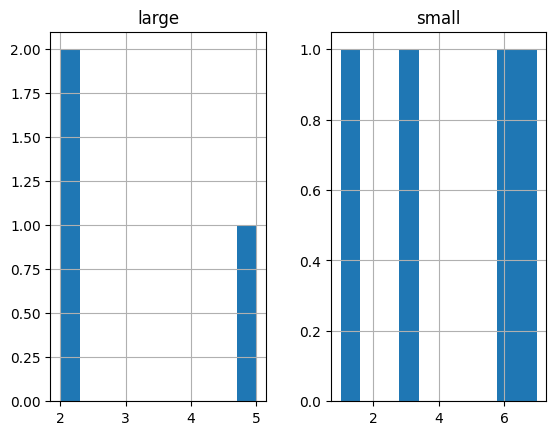

In [56]:
pivot_table.hist()

In [57]:
type(pivot_table)

pandas.core.frame.DataFrame

<Axes: xlabel='A,B'>

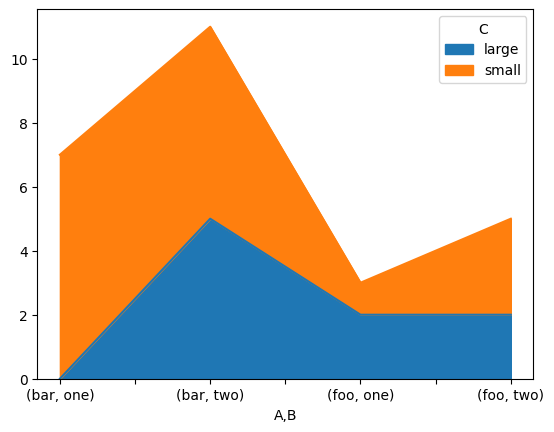

In [58]:
pivot_table.plot.area()